In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import statsmodels.api as sm
import datetime, time
# import pandas_datareader.data as web

# 导入计算pair trading的函数
from utils import *

try:
    import seaborn as sns
    from tqdm import tqdm_notebook
    import QUANTAXIS as QA
    import talib as ta
except:
    pass

In [11]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')

In [2]:
code_list_by_sector = pd.read_excel('data/etf_pair_code.xlsx', dtype={'symbol':str})
sector_list = code_list_by_sector.sector.unique().tolist()
etf_list = code_list_by_sector.etf_symbol.unique().tolist()
region_list = code_list_by_sector.region.unique().tolist()

In [3]:
etf_list

['XLK',
 'PNQI',
 'CQQQ',
 'GAMR',
 'PSJ',
 'SKYY',
 'HACK',
 'SOXX',
 'SMH',
 'XLV',
 'IBB',
 'ITA',
 'XLP',
 'XLY',
 'IAI',
 'VDE',
 'XLB']

In [4]:
result = calc_pair_trading('SMH', show_bar=True)

In [5]:
result = calc_pair_trading('SMH', method='rolling', show_bar=True, period=250)

In [6]:
result.keys()

dict_keys(['ratio', 'long_asset', 'long_return', 'long_short_return'])

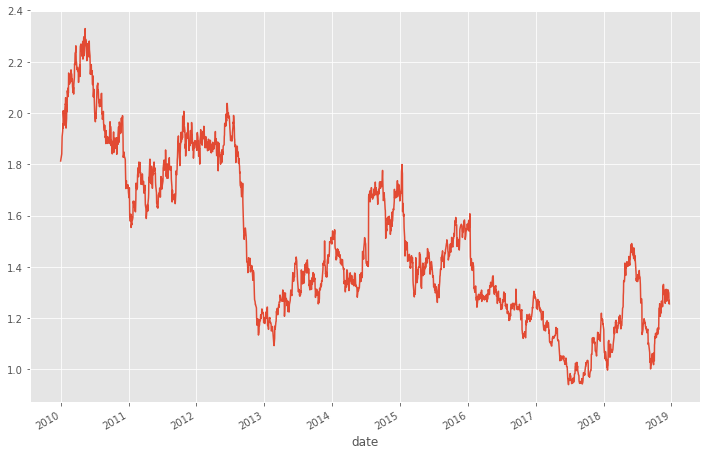

In [12]:
result['ratio']['INTC-TSM'].plot();

In [18]:
result['long_asset']

,INTC-TSM,INTC-AVGO,INTC-ASML,INTC-TXN,INTC-ADI,INTC-NVDA,INTC-LRCX,INTC-AMAT,INTC-NXPI,INTC-MU,...,MRVL-ON,MRVL-QRVO,MRVL-TER,MRVL-OLED,ON-QRVO,ON-TER,ON-OLED,QRVO-TER,QRVO-OLED,TER-OLED
date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED
2010-01-05,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED
2010-01-06,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED
2010-01-07,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED
2010-01-08,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED
2010-01-11,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED
2010-01-12,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED
2010-01-13,TSM,AVGO,ASML,TXN,ADI,NVDA,LRCX,AMAT,NXPI,MU,...,ON,QRVO,TER,OLED,QRVO,TER,OLED,TER,OLED,OLED


In [15]:
ratio = result['ratio']['INTC-TSM']

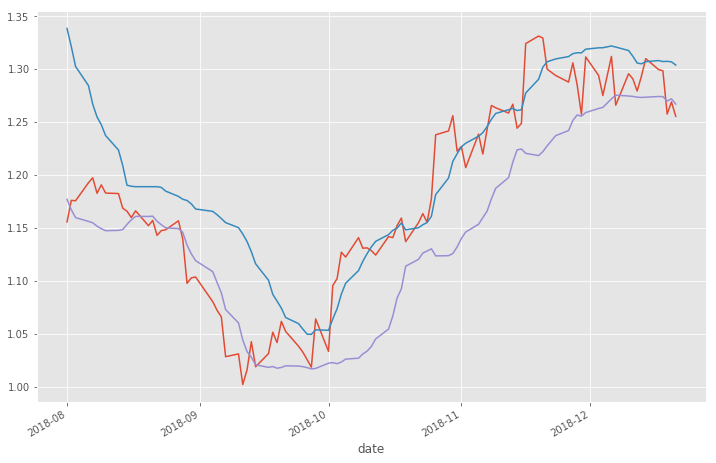

In [16]:
ratio_rolling_mean = ratio.rolling(14).mean()
ratio_rolling_std = ratio.rolling(14).std()
upper_line = ratio_rolling_mean + ratio_rolling_std
lower_line = ratio_rolling_mean - ratio_rolling_std

ratio[-100:].plot();
upper_line[-100:].plot();
lower_line[-100:].plot();